# Importation , preprocessing and EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dataset=pd.read_csv("Datasets/cleanedDataset.csv")
dataset=dataset.drop(columns='Unnamed: 0',axis=1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Statistical overview

In [3]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Check for data imbalance

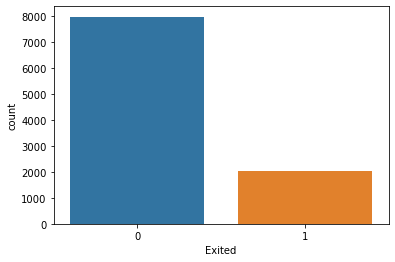

In [5]:
import seaborn as sns
sns.countplot(x=dataset['Exited'])
plt.show()

In [6]:
leave = len(dataset[dataset.Exited == 1])
notleave = len(dataset[dataset.Exited == 0])
print("Percentage of Customer who leave: {:.2f}%".format((leave / (len(dataset.Exited))*100)))
print("Percentage of Customer who don't leave: {:.2f}%".format((notleave / (len(dataset.Exited))*100)))

Percentage of Customer who leave: 20.37%
Percentage of Customer who don't leave: 79.63%


### From the above data is clearly imbalance

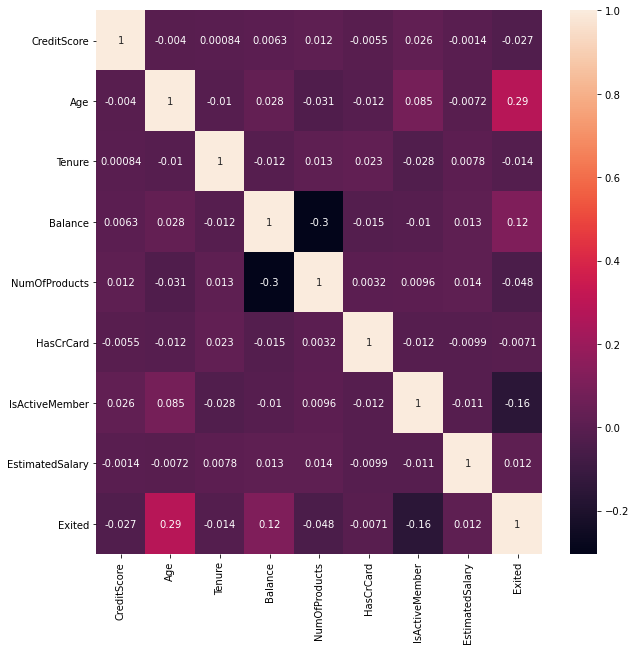

In [7]:
corr=dataset.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

Percentage of Female Customers: 54.57%
Percentage of Male Customers: 45.43%


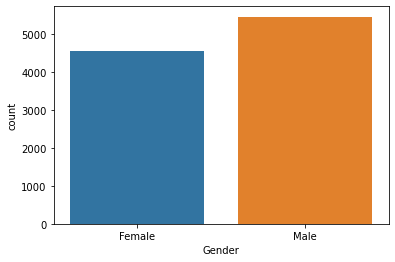

In [8]:
#Check the gender distribution
femalecount = len(dataset[dataset.Gender == "Male"])
malecount = len(dataset[dataset.Gender == "Female"])
print("Percentage of Female Customers: {:.2f}%".format((femalecount / (len(dataset.Gender))*100)))
print("Percentage of Male Customers: {:.2f}%".format((malecount / (len(dataset.Gender))*100)))

sns.countplot(x=dataset['Gender'])
plt.show()


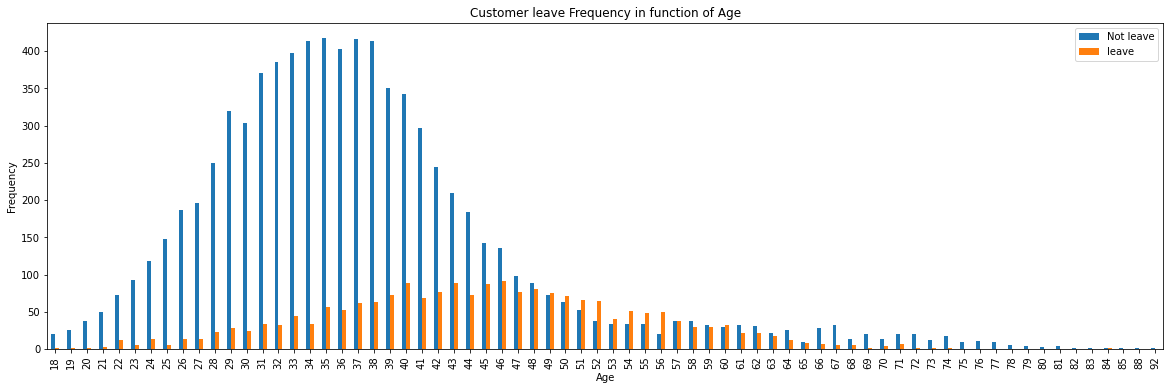

In [9]:
pd.crosstab(dataset.Age,dataset.Exited).plot(kind="bar",figsize=(20,6))
plt.title('Customer leave Frequency in function of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(labels=["Not leave", "leave"])
plt.savefig('churn decision vs age.png')
plt.show()

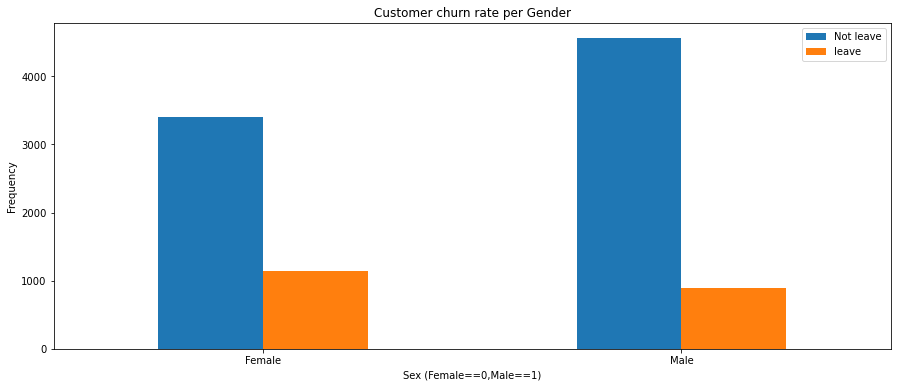

In [10]:
pd.crosstab(dataset.Gender,dataset.Exited).plot(kind="bar",figsize=(15,6))
plt.title('Customer churn rate per Gender')
plt.xlabel('Sex (Female==0,Male==1)')
plt.xticks(rotation=0)
plt.legend(["Not leave", "leave"])
plt.ylabel('Frequency')
plt.savefig('Churn risk per gender.png')
plt.show()

## Making object type variables numeric ones for easier further work

In [11]:
dataset1=dataset.copy()
dataset1['HasCrCard'][dataset1['HasCrCard'] == 0] = 'No'
dataset1['HasCrCard'][dataset1['HasCrCard'] == 1] = 'Yes'

dataset1['IsActiveMember'][dataset1['IsActiveMember'] == 0] = 'No'
dataset1['IsActiveMember'][dataset1['IsActiveMember'] == 1] = 'Yes'

<ipython-input-11-034945a42232>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['HasCrCard'][dataset1['HasCrCard'] == 0] = 'No'
<ipython-input-11-034945a42232>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['IsActiveMember'][dataset1['IsActiveMember'] == 0] = 'No'
<ipython-input-11-034945a42232>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['IsActiveMember'][dataset1['IsActiveMember'] == 1] = 'Yes'


In [12]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
a=dataset['Geography'].values
b=dataset['Gender'].values
print(a,b)

['France' 'Spain' 'France' ... 'France' 'Germany' 'France'] ['Female' 'Female' 'Female' ... 'Female' 'Male' 'Female']


In [14]:
dataset['Geography'][dataset['Geography'] == 'France'] = 1
dataset['Geography'][dataset['Geography'] == 'Spain'] = 2
dataset['Geography'][dataset['Geography'] == 'Germany'] = 3
dataset['Gender'][dataset['Gender'] == 'Female'] = 0
dataset['Gender'][dataset['Gender'] == 'Male'] = 1
dataset["Geography"] = dataset["Geography"].astype('int64')
dataset["Gender"] = dataset["Gender"].astype('int64')

<ipython-input-14-fe19a173dd33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Geography'][dataset['Geography'] == 'France'] = 1
<ipython-input-14-fe19a173dd33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Geography'][dataset['Geography'] == 'Spain'] = 2
<ipython-input-14-fe19a173dd33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Geography'][dataset['Geography'] == 'Germany'] = 3
<ipython-input-14-f

In [15]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [16]:
#Displaying the new Dataset
dataset.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Model Training and testing

## Spliting Dataset

In [17]:
#Split the data into X and y
y=dataset.Exited
X=dataset.drop("Exited",axis=1)


In [18]:
print(X)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          1       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          1       0   42       8  159660.80              3   
3             699          1       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          1       1   39       5       0.00              2   
9996          516          1       1   35      10   57369.61              1   
9997          709          1       0   36       7       0.00              1   
9998          772          3       1   42       3   75075.31              2   
9999          792          1       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [19]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
random_state=10
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=random_state,
                                               stratify=dataset.Exited)

In [21]:
num_columns=X.select_dtypes(include="number").columns.to_list()
num_features = [] 

for i in num_columns:
    location = X.columns.get_loc(i)
    num_features.append(location)
print(num_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Model Training

In [25]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbl_pipe
from sklearn.compose import ColumnTransformer, make_column_transformer
preprocess = make_column_transformer(
     (MinMaxScaler(), num_features)
)
preprocess

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])])

In [26]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
model = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=random_state),
                  xgb.XGBClassifier(random_state=random_state))

model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9])])),
                ('smote', SMOTE(random_state=10)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None

In [27]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'xgbclassifier__gamma': [0.5, 0.8, 1],
              'xgbclassifier__max_depth': [3, 4, 5, 6],
              'xgbclassifier__n_estimators': [50, 100, 200]
        }
grid = GridSearchCV(model, param_grid, verbose=3, cv= 5, n_jobs=4, scoring='f1_macro')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:00:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8,
                                                                          9])])),
                                       ('smote', SMOTE(random_state=10)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster

In [29]:
#Check the best parameter and score
print(grid.best_params_)
print(grid.best_score_)

{'xgbclassifier__gamma': 0.8, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 50}
0.76339938221742


In [31]:
#Make rediction using the best paramter(grid)
y_pred=grid.predict(X_test)
y_pred


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model evaluation

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1593
           1       0.63      0.62      0.63       407

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000

-----------------------------------------------------------------------


<AxesSubplot:>

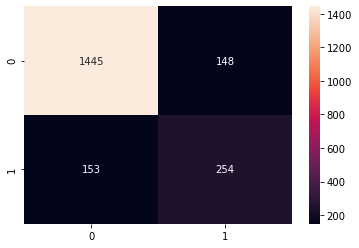

In [32]:
#Evaluate the mdoel using Confusion matrix,classification metrics
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cr)
print("-----------------------------------------------------------------------")
import seaborn as sns
sns.heatmap(cm,fmt="d",annot=True)

In [36]:
print(f"Predicted classes: \t{list(y_pred[:20])}")
print(f"Actual Labels: \t\t{list(y_test[:20])}")
print("precision of around 85% obtained")

Predicted classes: 	[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
Actual Labels: 		[1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
precision of around 85% obtained


In [34]:
#Save the model  using pickle
import pickle
pickle.dump(grid,open("xgboost.pkl", "wb"))


In [37]:

new_pred=grid.predict([[691,1,0,29,9,0.00,2,0,0,199635.93]])
new_prob=grid.predict_proba([[691,1,0,29,9,0.00,2,0,0,199635.93]])
new_pred
new_prob

array([[0.9673718 , 0.03262816]], dtype=float32)

In [38]:
X_test[:-1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2495,466,3,0,56,2,111920.13,3,1,0,197634.11
5652,691,1,0,29,9,0.00,2,0,0,199635.93
4081,721,2,1,33,5,0.00,2,0,1,117626.90
2152,745,1,0,55,9,110123.59,1,0,1,51548.14
641,706,1,0,29,5,112564.62,1,1,0,42334.38
...,...,...,...,...,...,...,...,...,...,...
7725,482,1,0,35,5,147813.05,2,0,0,109029.72
2135,736,3,1,57,9,95295.39,1,1,0,28434.44
545,842,2,0,44,2,112652.08,2,1,0,126644.98
266,498,1,1,34,2,0.00,2,1,1,148528.24
